# Exploratory Data Analysis of Sales Data

Objective: Discover any patterns in the selling structure and profit earned 

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Salesstore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [5]:
df.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


In [8]:
df.isnull().sum()

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

In [9]:
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [10]:
df.tail()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
725,56101,Not Specified,44,5347.13,Regular Air,1886.41,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,5.30,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,310.22,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


<clear>

## EDA

Areas to investigate:
1. Sales & Profit by Customer Segment
2. Sales & Profit by Regions
3. Sales & Profit by Product Category
4. Sales & Profit by Product Sub-Category

### 1. Sales & Profit by Customer Segment

In [37]:
cstm_sgmt = df.groupby(['Customer_Segment'])
cstm_sgmt.size()

Customer_Segment
Consumer          153
Corporate         518
Home Office        31
Small Business     28
dtype: int64

In [69]:
csgmt = cstm_sgmt[['Sales', 'Profit']].sum()

csgmt

,Sales,Profit
Customer_Segment,,
Consumer,186041.2210,18641.47
Corporate,805343.1240,120106.44
Home Office,70363.1295,11619.34
Small Business,35280.2125,1092.59


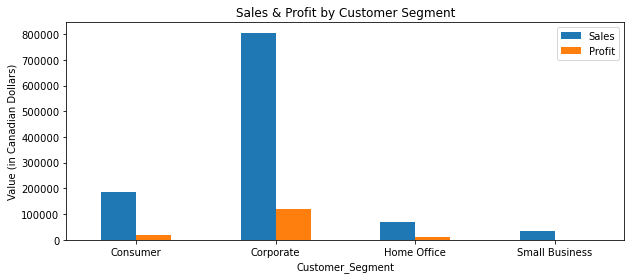

In [126]:
csgmt.plot.bar(figsize=(10,4))
plt.ylabel('Value (in Canadian Dollars)')
plt.title('Sales & Profit by Customer Segment')
plt.xticks(rotation='horizontal')
plt.show()

#### Corporate customers generated the most sales and porfit for the store.

### 2. Sales & Profit by Region

In [45]:
rgn = df.groupby(['Region'])
rgn.size()

Region
Atlantic                 170
Northwest Territories    150
Nunavut                   32
Ontario                   67
Prarie                    79
West                     232
dtype: int64

In [76]:
by_rgn = rgn[['Sales', 'Profit']].sum()

by_rgn

,Sales,Profit
Region,,
Atlantic,271205.1010,28393.28
Northwest Territories,275140.7555,59551.86
Nunavut,36306.4980,780.71
Ontario,81727.7725,16375.46
Prarie,86646.1360,6944.32
West,346001.4240,39414.21


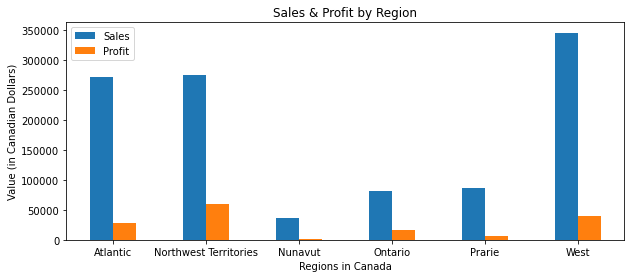

In [123]:
by_rgn.plot.bar(figsize=(10,4))
plt.xlabel('Regions in Canada')
plt.ylabel('Value (in Canadian Dollars)')
plt.title('Sales & Profit by Region')
plt.xticks(rotation='horizontal')
plt.show()

#### Northwest Territories generated the most profit for the store amongst the different regions.

#### The West territory generated the most sales for the store amongst the different regions.

<clear>

### 3 & 4. Sales & Profit by Product Category and Product Sub-Category

In [63]:
cols = ['Product_Category', 'Product_Sub-Category']    

In [68]:
for column in cols:
    prdcts = df.groupby(cols)[['Sales', 'Profit']].sum()

prdcts

Sales    Profit
Product_Category Product_Sub-Category                                
Furniture        Chairs & Chairmats               46081.410  12164.94
                 Office Furnishings               82682.300   8700.26
                 Tables                           23049.830  -3847.36
Office Supplies  Appliances                       97805.160  22731.86
                 Binders and Binder Accessories  106501.690  26291.74
                 Envelopes                        21486.180   6049.97
                 Labels                            3494.690   1296.60
                 Paper                            48963.040   3124.64
                 Pens & Art Supplies                679.950    -93.30
                 Scissors, Rulers and Trimmers     9620.820  -1759.58
                 Storage & Organization           94986.810  -4567.98
Technology       Computer Peripherals             65475.000   4982.06
                 Copiers and Fax                 159614.610   1561.39
                 Office Machines                  80050.060  26832.43
                 Telephones and Communication    256536.137  47992.17

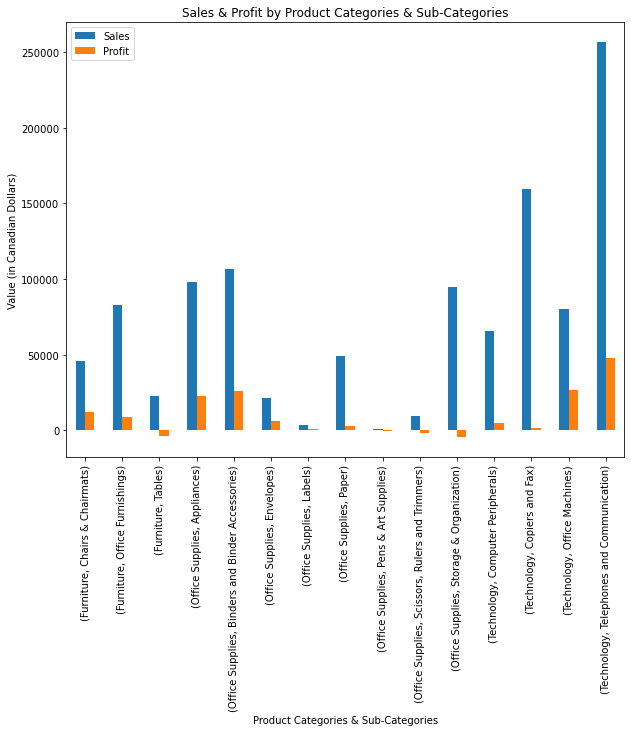

In [124]:
prdcts.plot.bar(figsize=(10,8))

plt.xlabel('Product Categories & Sub-Categories')
plt.ylabel('Value (in Canadian Dollars)')
plt.title('Sales & Profit by Product Categories & Sub-Categories')
plt.show()

#### The "Technology" Product Category and the "Telephones and Communication" sub-category generated the most sales and profit amongst the different categories and sub-categories.

<clear>

In [140]:
cstsgm_prdcts = df.groupby(['Customer_Segment', 'Product_Category'])[['Sales', 'Profit']].sum()

cstsgm_prdcts

Sales    Profit
Customer_Segment Product_Category                       
Consumer         Furniture          26331.2500   -432.49
                 Office Supplies    68535.6200   6748.32
                 Technology         91174.3510  12325.64
Corporate        Furniture         109817.5200  14911.67
                 Office Supplies   273196.7700  41330.09
                 Technology        422328.8340  63864.68
Home Office      Furniture          13086.7100   2192.23
                 Office Supplies    27007.6100   7333.97
                 Technology         30268.8095   2093.14
Small Business   Furniture           2578.0600    346.43
                 Office Supplies    14798.3400  -2338.43
                 Technology         17903.8125   3084.59

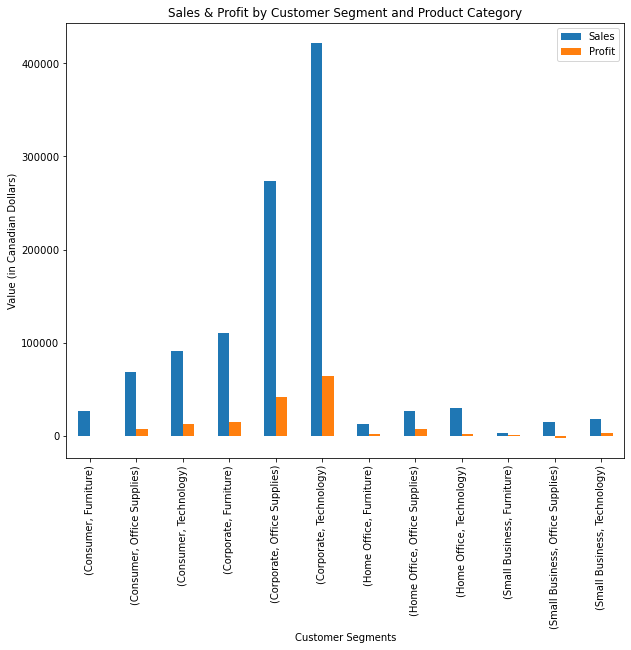

In [162]:
cstsgm_prdcts.plot.bar(figsize= (10,8))

plt.xlabel('Customer Segments')
plt.ylabel('Value (in Canadian Dollars)')
plt.title('Sales & Profit by Customer Segment and Product Category')
plt.show()

In [157]:
prdtcs_quantity_cstmsgm = df.groupby(['Customer_Segment', 'Product_Category'])[['Order_Quantity']].sum()

prdtcs_quantity_cstmsgm

Order_Quantity
Customer_Segment Product_Category                
Consumer         Furniture                    507
                 Office Supplies             2440
                 Technology                   772
Corporate        Furniture                   1740
                 Office Supplies             7599
                 Technology                  3518
Home Office      Furniture                    167
                 Office Supplies              473
                 Technology                   191
Small Business   Furniture                     80
                 Office Supplies              413
                 Technology                   246

<AxesSubplot:xlabel='Customer_Segment,Product_Category'>

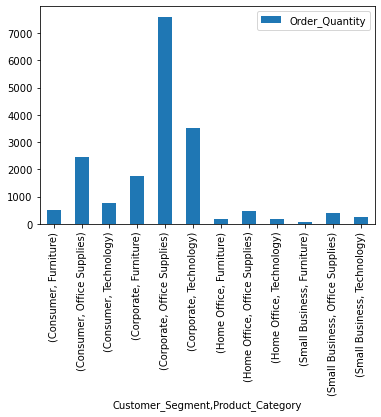

In [160]:
prdtcs_quantity_cstmsgm.plot.bar()

#### In the Product Category, 'Office Supplies' had the highest order quantity in each customer segment. 